# Homework  
Data documentation: https://tidyr.tidyverse.org/reference/who.html

Directions: Answer the three questions below. Create as many code/markdown blocks necessary to answer the questions. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv('who.csv')

In [2]:
df = df.drop(columns=['iso2', 'iso3'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7240 entries, 0 to 7239
Data columns (total 58 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       7240 non-null   object 
 1   year          7240 non-null   int64  
 2   new_sp_m014   3173 non-null   float64
 3   new_sp_m1524  3209 non-null   float64
 4   new_sp_m2534  3206 non-null   float64
 5   new_sp_m3544  3219 non-null   float64
 6   new_sp_m4554  3223 non-null   float64
 7   new_sp_m5564  3218 non-null   float64
 8   new_sp_m65    3209 non-null   float64
 9   new_sp_f014   3174 non-null   float64
 10  new_sp_f1524  3194 non-null   float64
 11  new_sp_f2534  3200 non-null   float64
 12  new_sp_f3544  3199 non-null   float64
 13  new_sp_f4554  3204 non-null   float64
 14  new_sp_f5564  3195 non-null   float64
 15  new_sp_f65    3197 non-null   float64
 16  new_sn_m014   1045 non-null   float64
 17  new_sn_m1524  1030 non-null   float64
 18  new_sn_m2534  1022 non-null 

#### Question 1. We need to know what's included in this data.
- How many countries are present?  
- What's the timespan of the data?  
- Does each country have a row for every year present?  
- Which countries are missing years?  
- How many rows have at least 1 non-null values across the columns 3-57?

#### 1.1. How many Countries are present

In [3]:
df.country.nunique()

219

#### 1.2. Whats the timespan of the data

In [4]:
df.year.unique()

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013], dtype=int64)

In [5]:
df.year.nunique()

34

#### 1.3. Does each country have a row for every year present? 

No, not all countries have every year in the given data

In [6]:
df1 = df[['year','country']]
#df1.head()
df2 = df1.groupby('country').count().sort_values(by='year')
df2 = df2.rename(columns={'year':'count'})
df2

,count
country,
South Sudan,3
Curacao,4
"Bonaire, Saint Eustatius and Saba",4
Sint Maarten (Dutch part),4
Serbia,9
...,...
Greece,34
Greenland,34
Grenada,34


#### 1.4. Which countries are missing years?  

In [7]:
df2.query('count<34') #Countries that have years missing

,count
country,
South Sudan,3
Curacao,4
"Bonaire, Saint Eustatius and Saba",4
Sint Maarten (Dutch part),4
Serbia,9
Montenegro,9
Timor-Leste,12
Serbia & Montenegro,25
Netherlands Antilles,30


#### 1.5. How many rows have at least 1 non-null values across the columns 3-57?

In [8]:
#getting req col name lists 3-57
col = df.columns[2:58].values.tolist()
df_NV = df[col]

In [9]:
#number of not null row counts
df_NV_cnt= pd.DataFrame(df_NV.notnull().sum(axis=1)).rename(columns = {0:'cnt'})
df_NV_cnt[df_NV_cnt.cnt > 0]

,cnt
17,14
18,14
19,14
20,14
21,14
...,...
7235,38
7236,42
7237,42
7238,42


3484 Number of not null rows present in data set

#### Question 2: Wide data isn't usually helpful.
Convert this to a long format with the following columns:  
1. country  
2. year  
3. diagnosis method: mapping should be: 

  {'newsp':'Pulmonary Smear (+)'
  ,'newsn':'Pulmonary Smear (-)'
  ,'newep':'Extrapulmonary'
  ,'newrel':'Relapse'}   
  

4. gender: male or female.   
5. age: lower_age - higher_age, e.g., 0-14  
6. number of cases  

In [10]:
df_long= pd.melt(df,id_vars=['country','year'],var_name=['new_sp'],value_name='Cases')
df_long

,country,year,new_sp,Cases
0,Afghanistan,1980,new_sp_m014,NaN
1,Afghanistan,1981,new_sp_m014,NaN
2,Afghanistan,1982,new_sp_m014,NaN
3,Afghanistan,1983,new_sp_m014,NaN
4,Afghanistan,1984,new_sp_m014,NaN
...,...,...,...,...
405435,Zimbabwe,2009,newrel_f65,NaN
405436,Zimbabwe,2010,newrel_f65,NaN
405437,Zimbabwe,2011,newrel_f65,NaN
405438,Zimbabwe,2012,newrel_f65,NaN


In [11]:
# extracting and updating SEX column
import re
df_long['Sex'] = df_long['new_sp'].apply(lambda x:'male' if re.search(r'_m',x) else 'women' )
df_long.tail()


,country,year,new_sp,Cases,Sex
405435,Zimbabwe,2009,newrel_f65,NaN,women
405436,Zimbabwe,2010,newrel_f65,NaN,women
405437,Zimbabwe,2011,newrel_f65,NaN,women
405438,Zimbabwe,2012,newrel_f65,NaN,women
405439,Zimbabwe,2013,newrel_f65,725.0,women


In [12]:
# extracting and updating AGE column

df_long['Age'] = df_long['new_sp'].str.extract('(\d+)')
df_long.head()


,country,year,new_sp,Cases,Sex,Age
0,Afghanistan,1980,new_sp_m014,NaN,male,014
1,Afghanistan,1981,new_sp_m014,NaN,male,014
2,Afghanistan,1982,new_sp_m014,NaN,male,014
3,Afghanistan,1983,new_sp_m014,NaN,male,014
4,Afghanistan,1984,new_sp_m014,NaN,male,014


In [13]:
Age_distribution = {'014' :'0-14','1524':'15-24','2534':'25-34', '4554':'45-54','5564':'55-64','65':'65' }
df_long['Age_classification'] = df_long.Age.map(Age_distribution)
df_long.head()


,country,year,new_sp,Cases,Sex,Age,Age_classification
0,Afghanistan,1980,new_sp_m014,NaN,male,014,0-14
1,Afghanistan,1981,new_sp_m014,NaN,male,014,0-14
2,Afghanistan,1982,new_sp_m014,NaN,male,014,0-14
3,Afghanistan,1983,new_sp_m014,NaN,male,014,0-14
4,Afghanistan,1984,new_sp_m014,NaN,male,014,0-14


In [14]:
# extracting and updating 'diagnosis method' column

df_long['diagnosis method'] = df_long['new_sp'].apply(lambda x:'Pulmonary Smear (+)' if re.search(r'new_sp',x) else ('Pulmonary Smear (-)' if re.search(r'new_sn',x) else ('Extrapulmonary' if re.search(r'newep',x) else 'Relapse')))
df_long.head()


,country,year,new_sp,Cases,Sex,Age,Age_classification,diagnosis method
0,Afghanistan,1980,new_sp_m014,NaN,male,014,0-14,Pulmonary Smear (+)
1,Afghanistan,1981,new_sp_m014,NaN,male,014,0-14,Pulmonary Smear (+)
2,Afghanistan,1982,new_sp_m014,NaN,male,014,0-14,Pulmonary Smear (+)
3,Afghanistan,1983,new_sp_m014,NaN,male,014,0-14,Pulmonary Smear (+)
4,Afghanistan,1984,new_sp_m014,NaN,male,014,0-14,Pulmonary Smear (+)


In [15]:
#removing columns 
df_long = df_long.drop(columns=[ 'Age','new_sp'])

In [16]:
df_long.tail()


,country,year,Cases,Sex,Age_classification,diagnosis method
405435,Zimbabwe,2009,NaN,women,65,Relapse
405436,Zimbabwe,2010,NaN,women,65,Relapse
405437,Zimbabwe,2011,NaN,women,65,Relapse
405438,Zimbabwe,2012,NaN,women,65,Relapse
405439,Zimbabwe,2013,725.0,women,65,Relapse


#### Question 3: Create a graph that shows when countries started to report TB cases.

In [20]:
year1 = list(df_long.year.unique())
country1 = list(df_long.country.unique())
ranges = range(0,len(country1)) 
country_year  = df_long.query('Cases> 0.0').groupby('country')['year'].min()

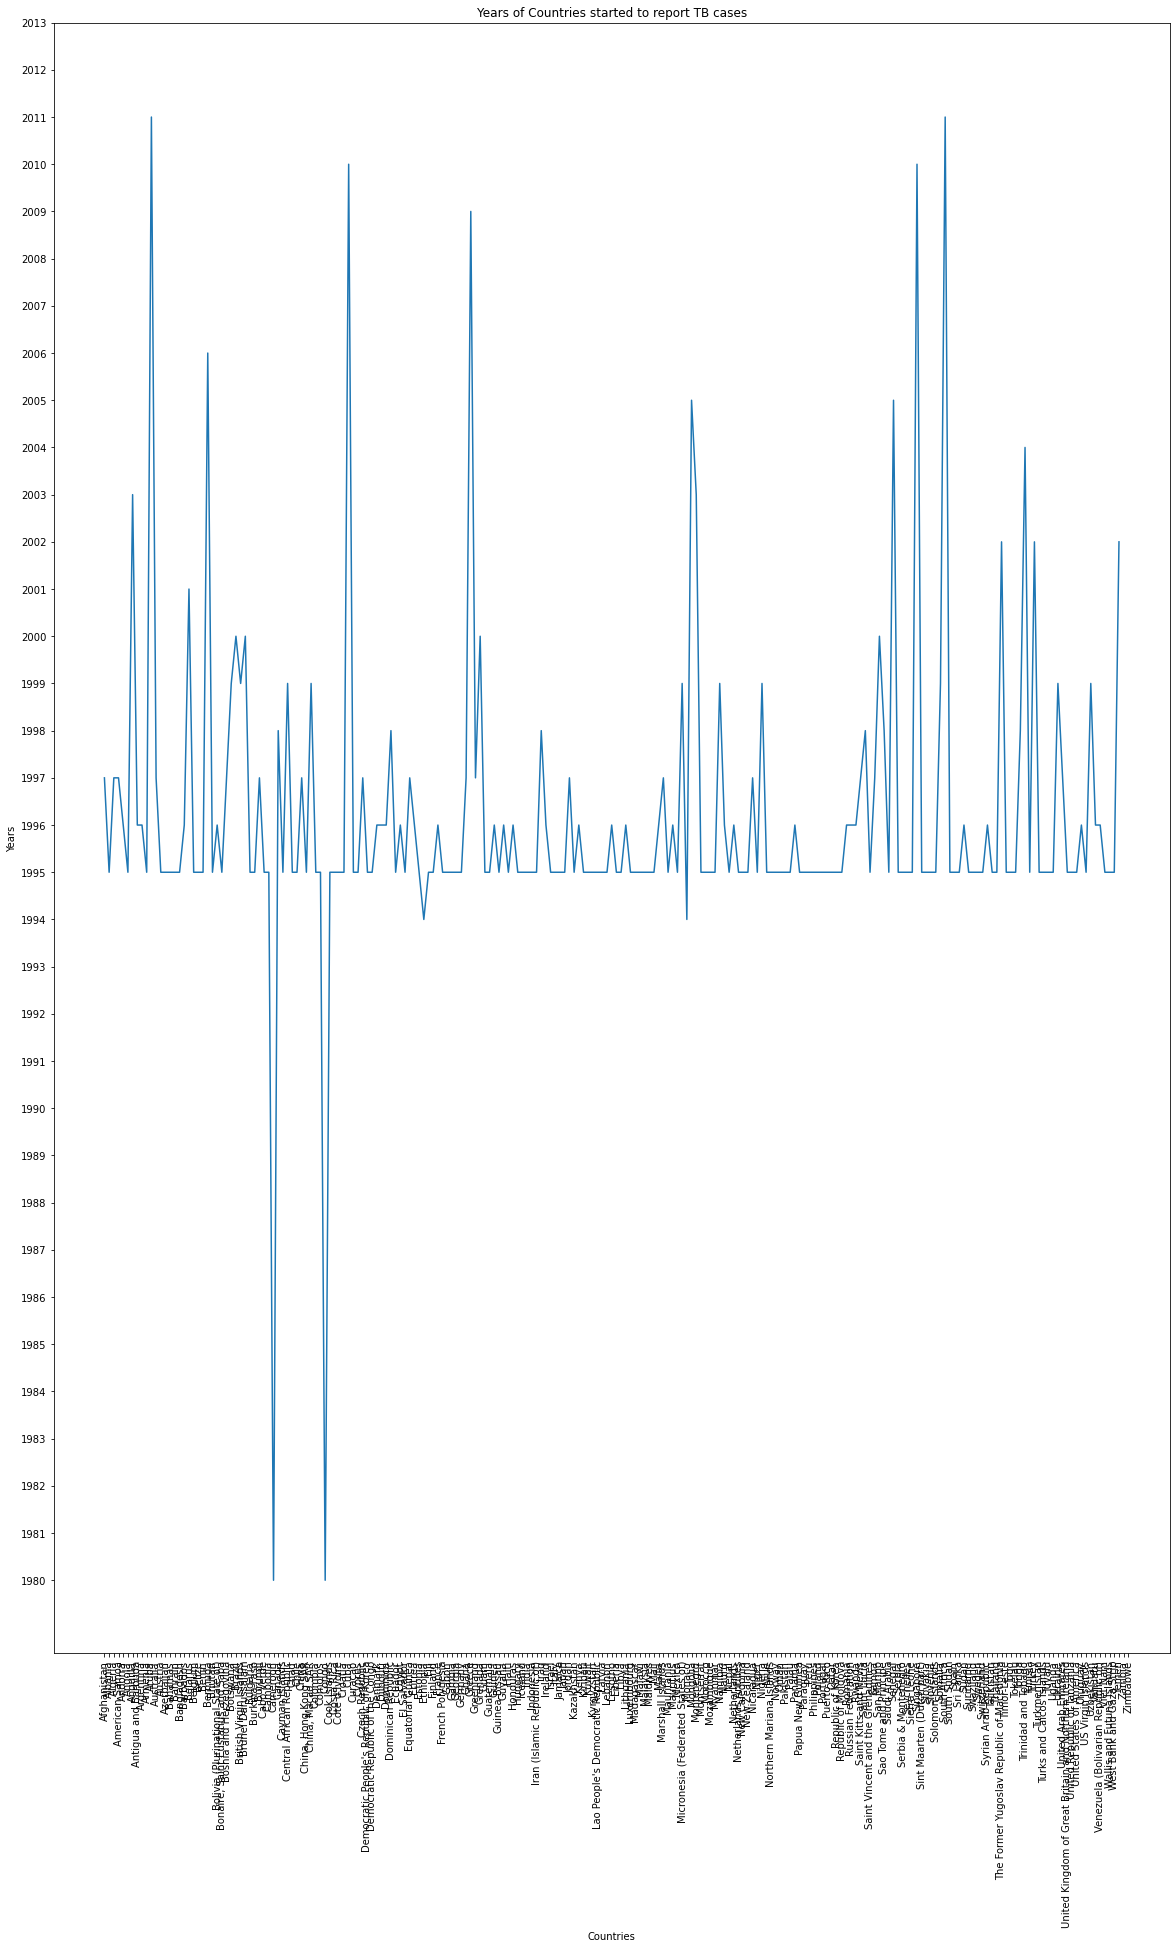

In [21]:
fig= plt.figure(figsize=(20,30))
country_year.plot(kind='line')
plt.xticks(ticks = ranges , rotation = 'vertical',labels = country1)
plt.yticks(year1)
plt.title('Years of Countries started to report TB cases')
plt.ylabel('Years')
plt.xlabel('Countries')
plt.show()